In [23]:
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt
from typing import List
import seaborn as sns

In [24]:
class Layer(object):
    
    def __init__(self):
        pass
    
    def forward(self, input_: ndarray) -> ndarray:
        return self._output(input_)
    
    def backward(self, back_grad: ndarray) -> ndarray:
        raise NotImplementedError

In [25]:
class ParamLayer(Layer):
    
    def __init__(self, num_neurons: int):
        self.neurons = num_neurons
        self.first = True
        
    def forward(self, input_: ndarray) -> ndarray:
        self.input_ = input_
        return self._output(self.input_)
        
    def backward(self, back_grad: ndarray) -> ndarray:
        self._param_derivation(back_grad)
        return self._input_derivation(back_grad)
        
    def _output(self, input_: ndarray) -> ndarray:
        raise NotImplementedError()
        
    def _param_derivation(self, back_grad: ndarray):
        raise NotImplementedError()
        
    def _input_derivation(self, back_grad: ndarray) -> ndarray:
        raise NotImplementedError()

In [26]:
class Linear(ParamLayer):
    
    def __init__(self, input_size, num_neurons: int):
        super().__init__(num_neurons)
        self.params = []
        self.params.append(np.random.normal(size=(input_size, self.neurons)))
        self.params.append(np.random.normal(size=(1, self.neurons)))

    def _output(self, input_: ndarray) -> ndarray:
        return np.dot(self.input_, self.params[0]) + self.params[1]
        
    def _param_derivation(self, back_grad: ndarray):
        self.param_derivates = []
        self.param_derivates.append(np.dot(self.input_.T, back_grad))
        self.param_derivates.append(np.sum(back_grad, axis=0).reshape(1, self.neurons))
        
    def _input_derivation(self, back_grad: ndarray) -> ndarray:
        return np.dot(back_grad, self.params[0].T)

In [27]:
class Sigmoid(Layer):
    
    def __init__(self):
        pass
    
    def _output(self, input_):
        self.output = 1/(1+np.exp(-input_))
        return self.output
    
    def backward(self, backprop_grad: ndarray) -> ndarray:
        return self.output * (1.0 - self.output) * backprop_grad

In [28]:
class Tanh(Layer):

    def __init__(self):
        pass

    def _output(self, input_):
        self.output = np.tanh(input_)
        return self.output

    def backward(self, backprop_grad: ndarray) -> ndarray:
        return (1.0 - self.output**2) * backprop_grad

In [29]:
class Model(object):
    
    def __init__(self, layers: List[Layer]):
        self.layers = layers
        
    def forward(self, input_: ndarray) -> ndarray:
        output = input_
        for layer in self.layers:
            output = layer.forward(output)
        return output
    
    def backward(self, error_grad: ndarray):
        back_error = error_grad
        for layer in reversed(self.layers):
            back_error = layer.backward(back_error)

        self._param_grads()
            
    def params(self):
        params_list = []
        for layer in self.layers:
            if hasattr(layer, 'params'):
                for param in layer.params:
                    params_list.append(param)
        return params_list
                    
    def _param_grads(self):
        self.param_grads = []
        for layer in self.layers:
            if hasattr(layer, 'params'):
                 for param_derivate in layer.param_derivates:
                        self.param_grads.append(param_derivate)

In [30]:
x = np.linspace(0, 1.0, 200)
y = 1.0*x + np.sin(x * 10.0) * 0.15 + np.random.normal(size=(x.shape[0],)) * 0.04

x_train = x.reshape(-1, 1)
y_target = x.reshape(-1, 1)

In [31]:
linear1 = Linear(1, 10)
tan1 = Tanh()
linear2 = Linear(10, 10)
tan2 = Tanh()
linear3 = Linear(10, 1)
model = Model([linear1, tan1, linear2, tan2, linear3])

params = model.params()

for epoch in range(1000):
    shuffled = np.random.permutation(x_train.shape[0])
    x_train_sh, y_target_sh = x_train[shuffled], y_target[shuffled]
    for ii in range(0, x_train.shape[0], 40):
        x_batch, y_batch = x_train_sh[ii:ii + 40], y_target_sh[ii:ii + 40]
        y_pred = model.forward(x_batch)
        error = 2.0 * (y_pred - y_batch)/y_batch.shape[0]
        model.backward(error)

        for (param, param_grad) in zip(params, model.param_grads):
            param -= param_grad * 0.03

    if (epoch + 1) % 100 == 0:
        y_pred = model.forward(x_train)
        error = np.mean(np.sum((y_pred - y_target)**2, axis=1))
        print(error)



0.0006019176053001146
0.0002630125771202137
0.0001495360790603209
0.00010509578251698626
7.261775984702907e-05
5.984431039358154e-05
5.328108827606915e-05
4.6255694399479944e-05
4.1855794134519413e-05
3.8557360134660195e-05


In [32]:
y_pred = model.forward(x_train)

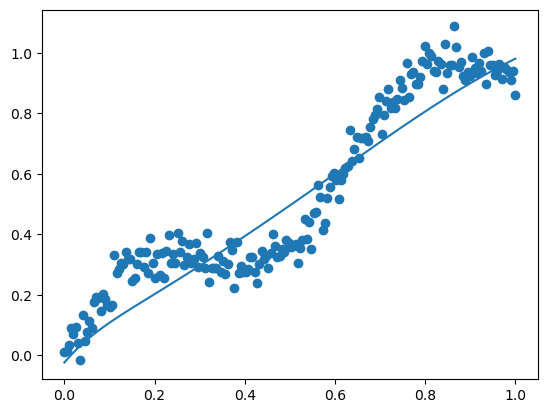

In [33]:
plt.scatter(x=x, y=y)
plt.plot(x, y_pred.reshape(200))
plt.show()